<a href="https://colab.research.google.com/github/Jenn-mawia/Regression-Mini-projects/blob/main/Predicting_acceptance_into_University.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Objective: Predict one's chance of getting into grad school. 

# **Importing Libraries**

In [13]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Reading the data**

In [2]:
# reading the data
data = pd.read_csv("uni_admission.csv")

# displaying the number of records in the dataset 
print(data.shape)

# check the top of the dataset
data.head()

(500, 9)


,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Quick Data Cleaning Checks**

In [3]:
# remove the first column ("Serial No.") as it is not useful here
data = data.drop('Serial No.', axis=1)

In [4]:
# check for missing values
print(data.isnull().sum())

# check the datatypes
print(data.dtypes)

# check for any duplicates
print(data.duplicated().sum())

GRE             0
TOEFL           0
uni_rating      0
SOP             0
LOR             0
CGPA            0
publications    0
admit_chance    0
dtype: int64
GRE               int64
TOEFL             int64
uni_rating        int64
SOP             float64
LOR             float64
CGPA            float64
publications      int64
admit_chance    float64
dtype: object
0


The data is of numeric type with no missing values or duplicated entries


# **Exploratory Data Analysis**

## **Univariate Analysis**

In [5]:
# summary statistics of the data
data.describe()

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


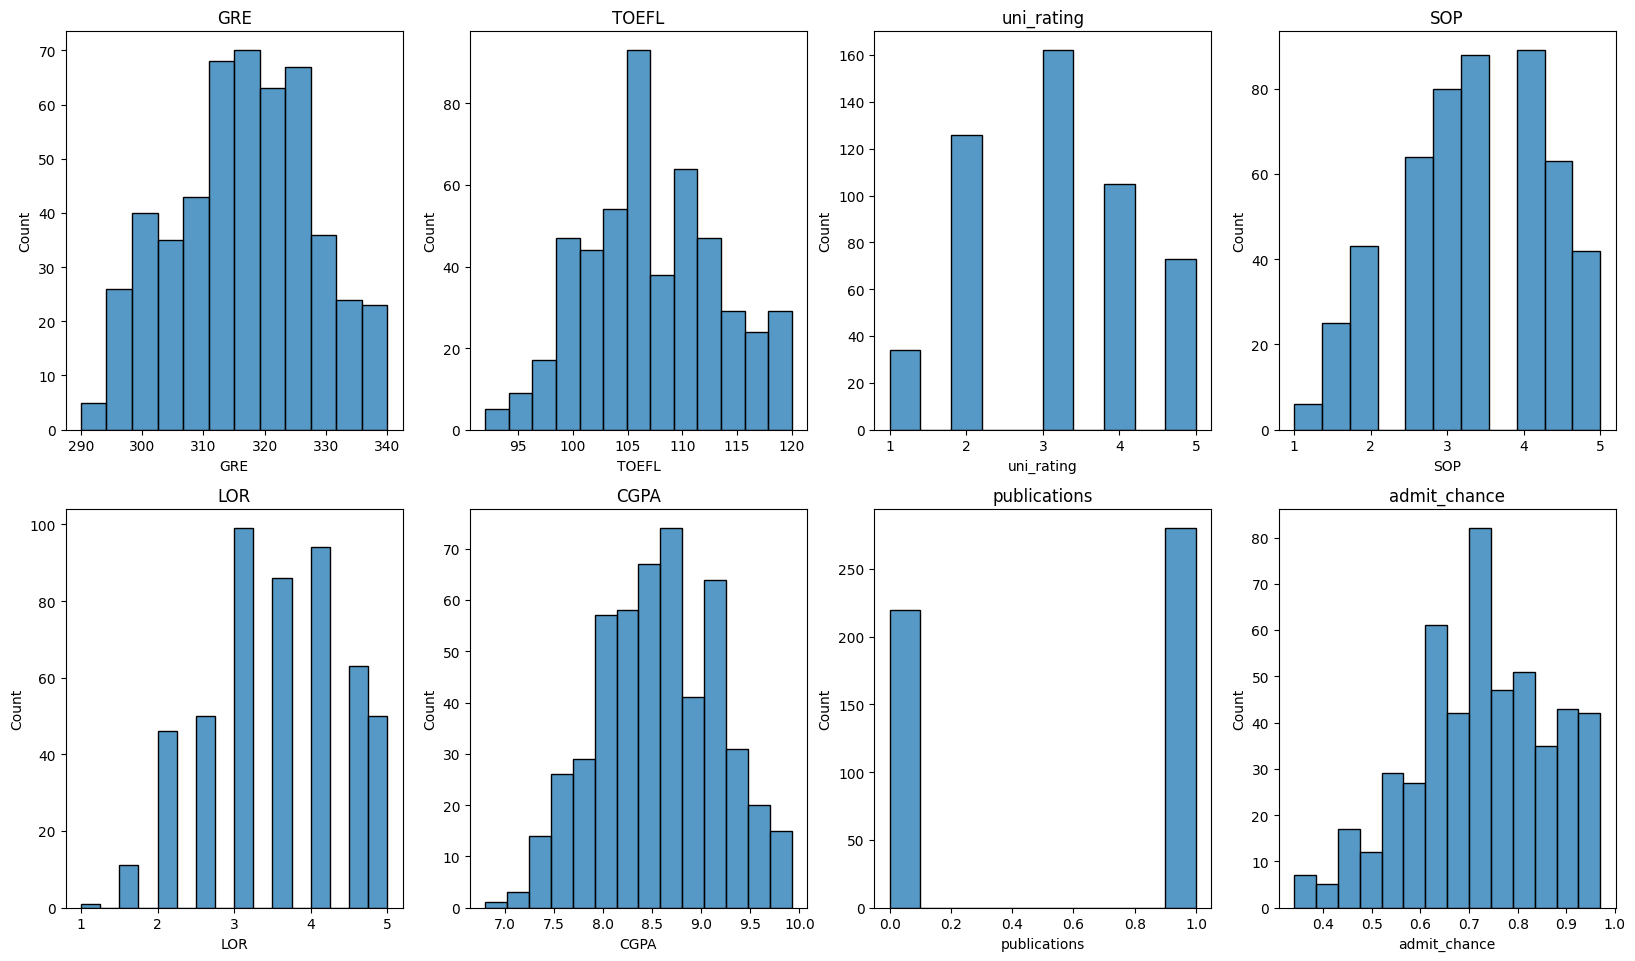

In [6]:
columns_dictionary = {'GRE':1, 'TOEFL':2, 'uni_rating':3, 'SOP':4, 'LOR':5, 'CGPA':6, 
                      'publications':7,'admit_chance':8}

# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in columns_dictionary.items():
  
  plt.subplot(5,4,i)
  sns.histplot(data[variable])
  plt.title(variable)

plt.show()

Most of the variables exhibit normal distribution. There are a few categorical variables:
- uni_rating
- publications
- LOR
- SOP





In [7]:
# check if this is actually true

variables = data[['uni_rating', 'SOP', 'LOR', 'publications']]

for variable in variables:
  print(data[variable].unique()) #print unique values in each of these variables



[4 3 2 5 1]
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
[1 0]


## **Bivariate Analysis**



Since the aim is to predict one's chance of getting into grad school it is important to check the relationship of each variable against the chance of getting into grad school. 


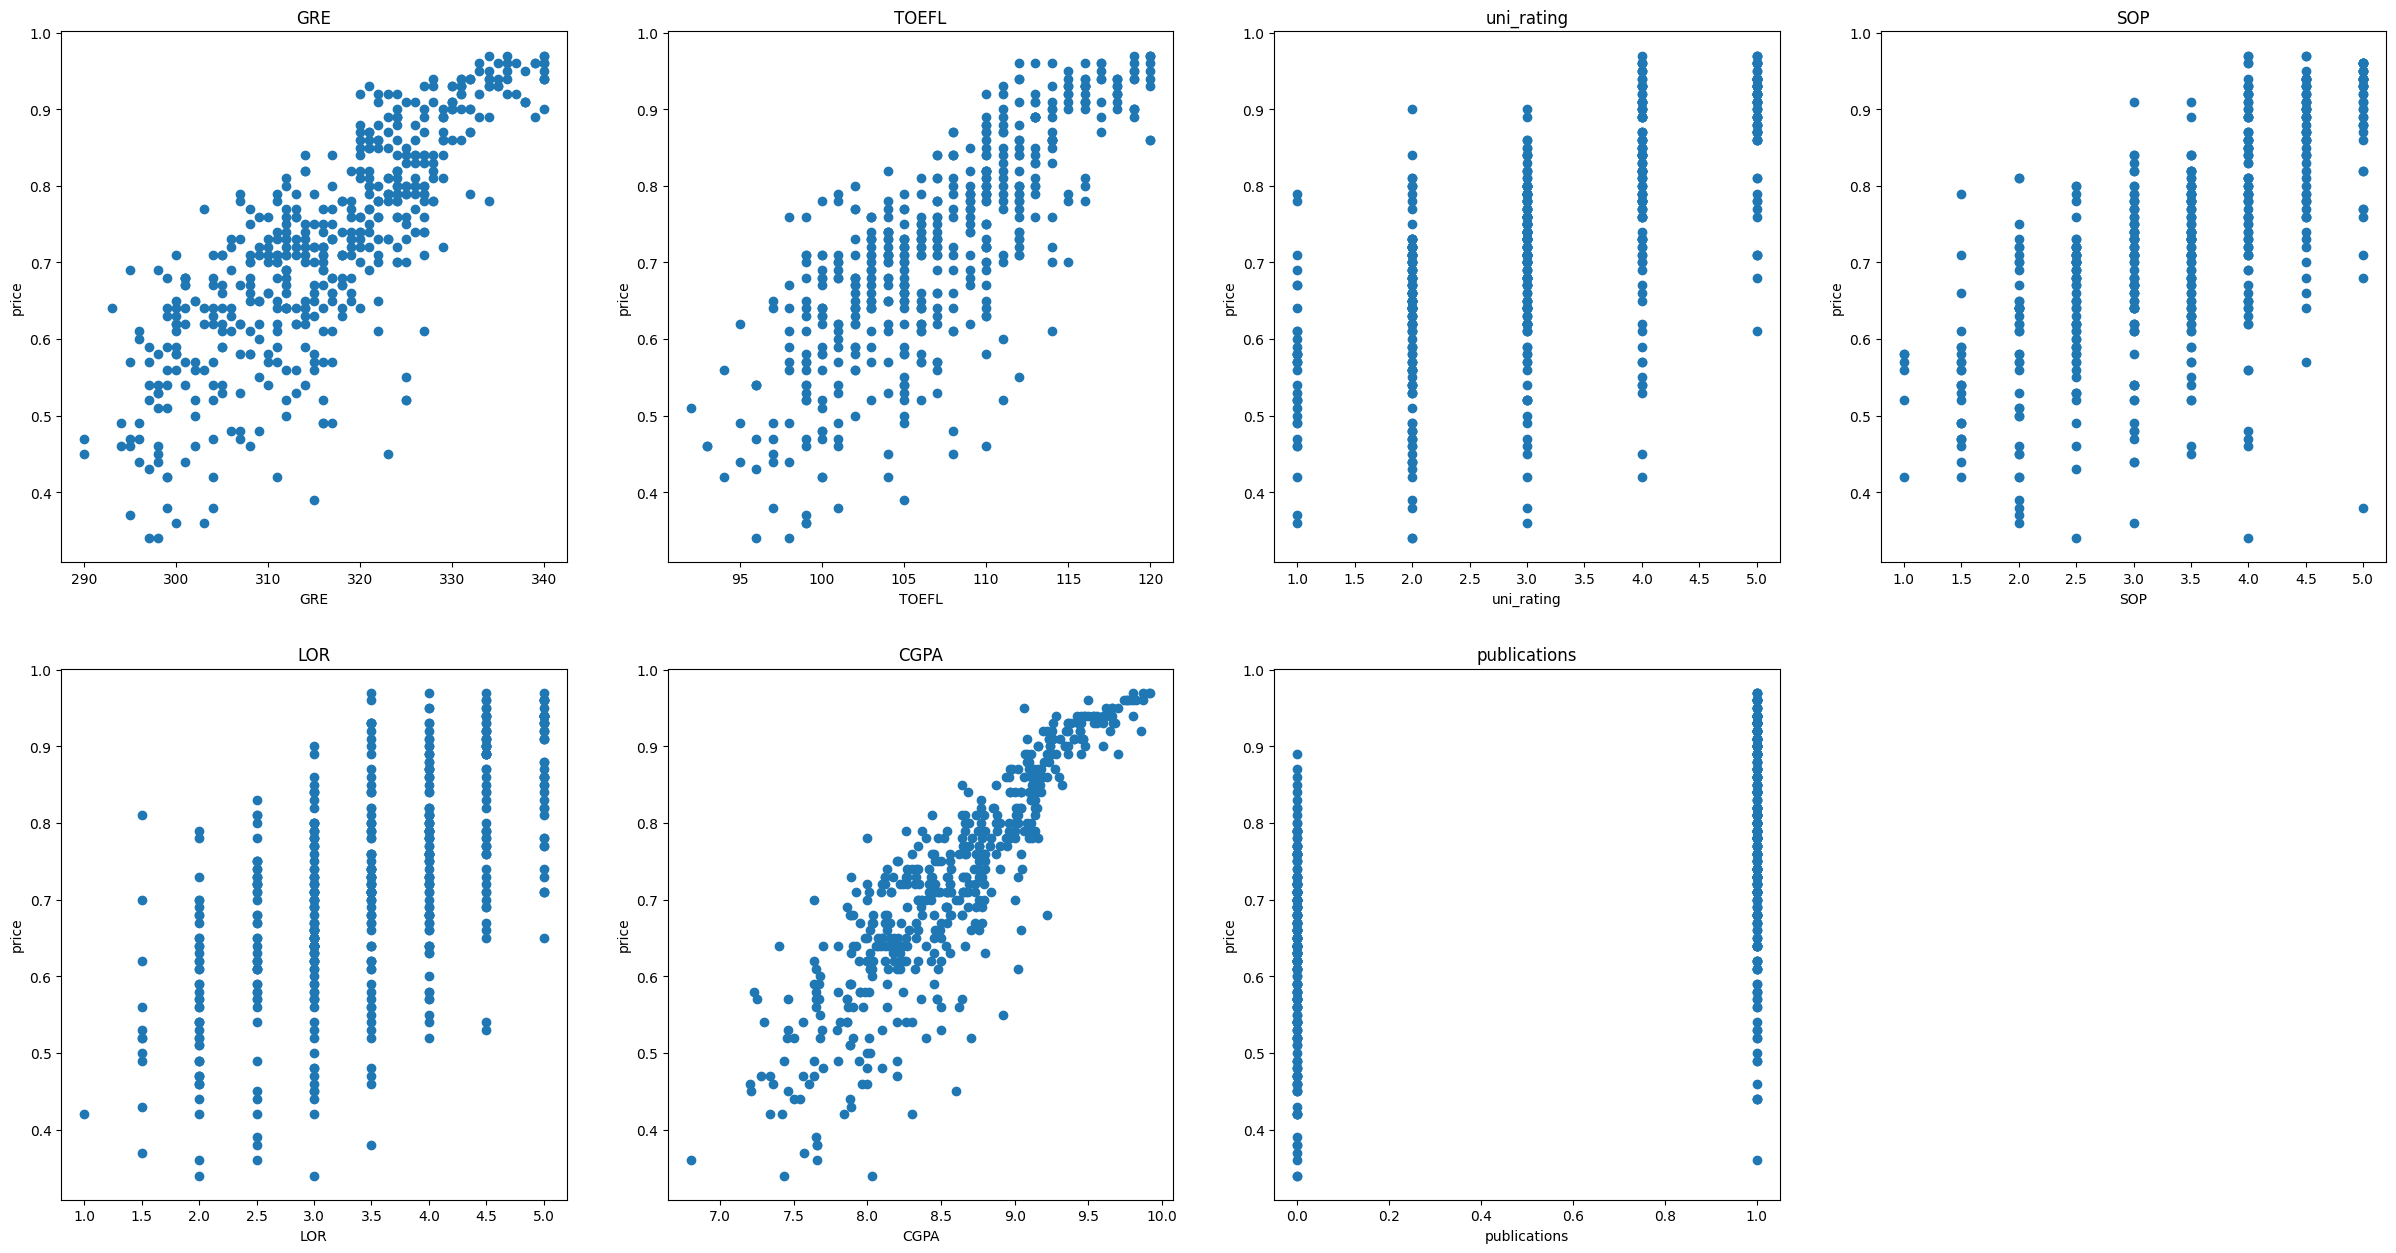

In [8]:
columns_dict2 = {'GRE':1, 'TOEFL':2, 'uni_rating':3, 'SOP':4, 'LOR':5, 'CGPA':6, 
                      'publications':7}

plt.figure(figsize=(30,40))
# make a scatterplot for each numerical column
for variable,i in columns_dict2.items():
  plt.subplot(5,4,i)
  x = data[variable]
  y = data['admit_chance']
  plt.scatter(x, y, marker='o')
  plt.title(variable)
  plt.xlabel(variable)
  plt.ylabel('price')

There is an evident linear relationship between the GRE, TOEFL and CGPA scores. There are some outliers in the dataset however, we will not dive deep into dealing with outliers at the moment. 

# **Modeling**

## **Linear Regression using one variable.(Single Linear Regression)**

In [10]:
# we will use the first variable 'GRE'

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values

# use 20% of the data as test data size and 80% as train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# build the linear regression model
single_linear_model = LinearRegression()

# fit the training data
single_linear_model.fit(X_train, y_train)

# make predictions using the model
y_single_predict = single_linear_model.predict(X_test)

# cross-check the values against the predicted values
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_single_predict.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


The model is not badly off as the actual and predicted values are within the same range, except for the Minimum value that is a little bit off. 

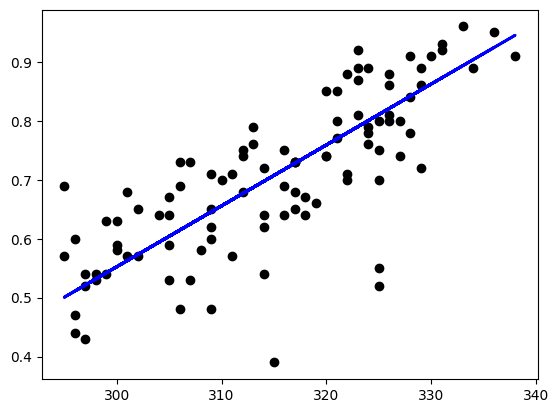

In [12]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_single_predict, color='blue', linewidth=2)
plt.show()

The line of best fit is nicely centered but there are a few outliers. We can better assess the model performance using other metrics such as RMSE, MAE and r^2 score. 

In [15]:
# MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_single_predict))

# MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_single_predict))  

# RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_single_predict))) 

Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


The important metric here is the RMSE, which will be used to compare model performance to each other - the lower the RMSE, the better the model. 

>It is relative to the dependent variable("admit_chance"). The variable ranges from 0.34 to 0.97, with mean of 0.72 and a standard deviation of 0.14. This makes an RMSE of 0.085 somewhat acceptable. If the data ranges from 0 to 10, an RMSE of 0.085 would be incredible!

Does the model improve when more variables are used? 


## **Multiple Linear Regression**

In [16]:
# split the data into features and labels
X = data.drop('admit_chance', 1).values #features
y = data['admit_chance'].values #labels

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# build the linear regression model
multiple_linear_model = LinearRegression()

# fit the training data
multiple_linear_model.fit(X_train, y_train)

# make predictions using the model
y_multiple_predict = multiple_linear_model.predict(X_test)

# cross-check the values against the predicted values
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_multiple_predict.flatten()})
comparison_frame.describe()

<ipython-input-16-e76355d8a8ab>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('admit_chance', 1).values #features


,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.698319
std,0.13282,0.126640
min,0.39000,0.458354
25%,0.60000,0.601047
50%,0.70500,0.682516
75%,0.80000,0.792212
max,0.96000,0.970150


There are slight improvements which should also be seen on the key metrics. 

In [17]:
# MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_multiple_predict))

# MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_multiple_predict))  

# RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_multiple_predict))) 


Mean Absolute Error: 0.04825389374865462
Mean Squared Error: 0.0040796800346021
Root Mean Squared Error: 0.06387237301527242


The RMSE is significantly lower than the previous model. This is a sign that the Linear Regressor gives better predictions when more independent variables are involved. 